<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisCuantitativoAvanzado/blob/main/Clasificación/Desbalance_de_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generación de datos

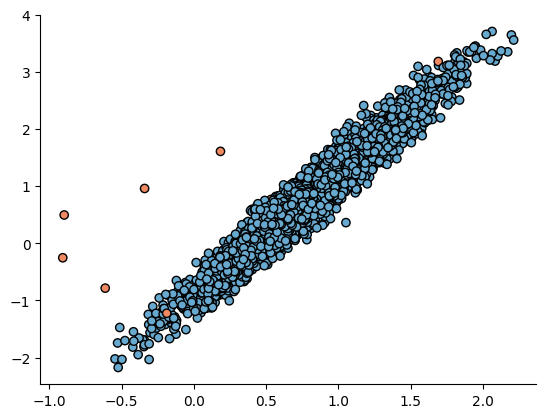

In [15]:
import seaborn as sns
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.001, 0.999],
                           class_sep=0.8, random_state=0)

import matplotlib.pyplot as plt
colors = ['#ef8a62' if v == 0 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig = plt.Figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()

In [45]:
import numpy as np
unique_elements, counts = np.unique(y, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"La Clase {element} tiene {count} elementos.")

La Clase 0 tiene 32 elementos.
La Clase 1 tiene 4968 elementos.


El desbalance de clase en este ejemplo es

In [63]:
32/5000

0.0064

En un ejemplo un poco exagerado, pero incluso la partición podría generar un parte sin observaciones de una clase. 

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,  train_size=0.99, random_state=1)

In [60]:
unique_elements, counts = np.unique(y_test, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"La Clase {element} tiene {count} elementos.")

La Clase 1 tiene 50 elementos.


En una situación no tan exagerada, de todas formas el desbalance podría ser más marcado que el desbalance original

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,  train_size=0.8, random_state=1)

In [75]:
unique_elements, counts = np.unique(y_test, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"La Clase {element} tiene {count} elementos.")

La Clase 0 tiene 5 elementos.
La Clase 1 tiene 995 elementos.


In [76]:
counts[0]/(counts[0]+counts[1])

0.005

A este fin el método train_test_split tiene una opción de estratificación

In [77]:
X_train, X_test, y_train, y_test=train_test_split(X,y,  train_size=0.8, random_state=1, stratify=y)

In [78]:
unique_elements, counts = np.unique(y_test, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"La Clase {element} tiene {count} elementos.")

La Clase 0 tiene 6 elementos.
La Clase 1 tiene 994 elementos.


In [79]:
counts[0]/(counts[0]+counts[1])

0.006

# Algún modelo

In [81]:
from sklearn.linear_model import LogisticRegression 

clf=LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [83]:
# ¿Es bueno este score? Si, pero ojo...
clf.score(X_test, y_test)

0.994

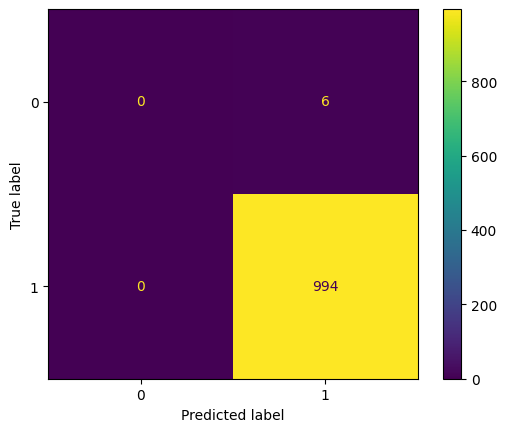

In [88]:
# Lo único que hizo el modelo fue decir que eran TODOS unos! Eso serviría de muy poco si quiero detectar "fraude" por ejemplo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Over sampling

In [100]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [101]:
# La cantidad de elementos de la clase minoritaria se eleva hasta igualar a la mayoritaria
unique_elements, counts = np.unique(y_resampled, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"La Clase {element} tiene {count} elementos.")

La Clase 0 tiene 3974 elementos.
La Clase 1 tiene 3974 elementos.


In [93]:
clf=LogisticRegression()
clf.fit(X_resampled, y_resampled)

LogisticRegression()

In [94]:
clf.score(X_test, y_test)

0.689

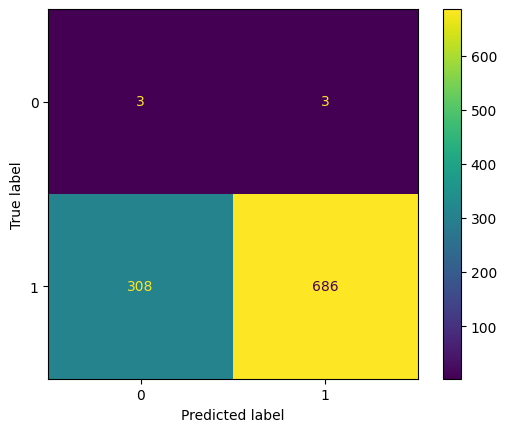

In [95]:
# La predicción es peor, pero al menos detectó correctamente 3 fraudes...
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Under sampling

In [102]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [103]:
# La cantidad de elementos de la clase mayoritaria se reduce hasta alcanzar el valor de la clase minoritaria
unique_elements, counts = np.unique(y_resampled, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"La Clase {element} tiene {count} elementos.")

La Clase 0 tiene 26 elementos.
La Clase 1 tiene 26 elementos.


In [97]:
clf=LogisticRegression()
clf.fit(X_resampled, y_resampled)

LogisticRegression()

In [98]:
clf.score(X_test, y_test)

0.777

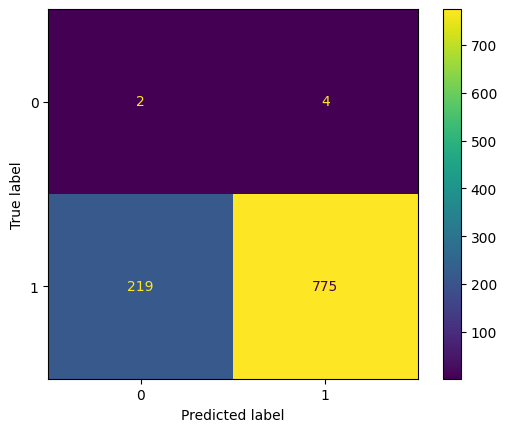

In [99]:
# La predicción es bastante mejor y encontró 2 fraudes
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Otros algoritmos para balancear clases

In [104]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [105]:
clf=LogisticRegression()
clf.fit(X_resampled, y_resampled)

LogisticRegression()

In [106]:
clf.score(X_test, y_test)

0.64

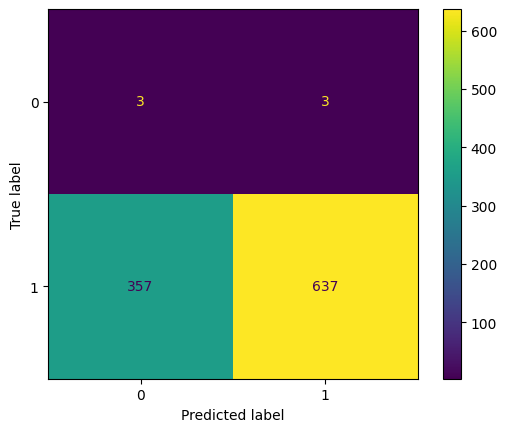

In [107]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [108]:
X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)

In [109]:
clf=LogisticRegression()
clf.fit(X_resampled, y_resampled)

LogisticRegression()

In [ ]:
clf.score(X_test, y_test)

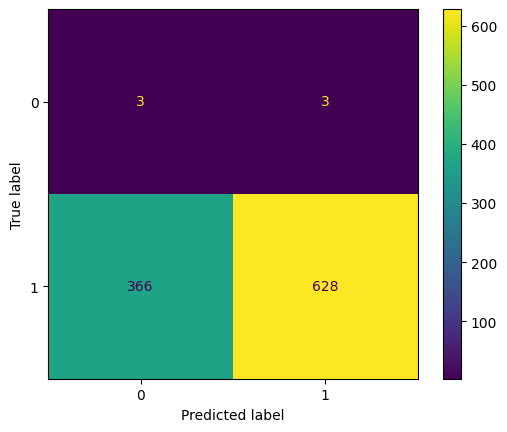

In [111]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()